<a href="https://colab.research.google.com/github/jangidprashantjee185045/ann/blob/project1/linear_regressionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [104]:
import tensorflow as tf
from tensorflow import keras

In [105]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [106]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [107]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [108]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.fit_transform(X_valid)
X_test=scaler.fit_transform(X_test)

In [110]:
np.random.seed(42)
tf.random.set_seed(42)

In [111]:
X_train.shape

(11610, 8)

In [112]:
X_test.shape

(5160, 8)

In [113]:
X_valid.shape

(3870, 8)

In [114]:
model=keras.models.Sequential([
     keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
     keras.layers.Dense(30,activation="relu"),
     keras.layers.Dense(1)                         
])

In [115]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(),
              metrics=["mae"])

In [116]:
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6710 - mae: 0.5744 - val_loss: 0.4717 - val_mae: 0.4942
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4325 - mae: 0.4700 - val_loss: 0.4589 - val_mae: 0.4840
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4298 - mae: 0.4605 - val_loss: 0.4580 - val_mae: 0.4809
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3919 - mae: 0.4416 - val_loss: 0.4391 - val_mae: 0.4680
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3810 - mae: 0.4323 - val_loss: 0.4352 - val_mae: 0.4755
Epoch 6/20
363/363 [==============================] - 0s 982us/step - loss: 0.3731 - mae: 0.4285 - val_loss: 0.4591 - val_mae: 0.4715
Epoch 7/20
363/363 [==============================] - 0s 982us/step - loss: 0.3661 - mae: 0.4259 - val_loss: 0.4144 - val_mae: 0.4634
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss

In [117]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 707us/step - loss: 0.3898 - mae: 0.4528


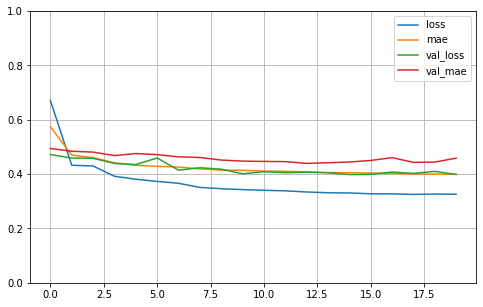

In [118]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [119]:
X_test[:3]

array([[-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
         0.56243986,  0.22075674,  0.2580042 ],
       [-0.69738315,  0.09834786, -0.14086589,  0.17205266,  0.13229717,
        -0.17390163, -0.20888265,  0.0337006 ],
       [-0.19475766,  1.85735988, -0.54547279,  0.15860488, -0.09942866,
        -0.98514082,  1.03333558, -1.45168768]])

In [120]:
print(model.predict(X_test[:3]))

[[0.80195326]
 [1.7551814 ]
 [5.3358665 ]]


In [121]:
print(y_test[:3])

[0.477   0.458   5.00001]
